## Udacity Data Analyst ND Data Wrangling Project 

Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics

Tasks in this project are as follows:
- Gathering and Collecting data
- Assessing Data 
- Cleaning Storing, Analyzing, and Visualizing Data 


## Gathering and  Collecting data 

There are three data source for this analysis:

- Enhanced Twitter Archive: already downloaded as a csv file (twitter_archive_enhanced.csv)
- The tweet image predictions: located on a remote server (image_predictions.tsv)
- Twitter API: get and save the data into tweet-json.txt. Tweet ID, retweet count, and favorite count should be included.


First installing the latest version from PyPI  by using pip in the OS terminal 
>pip install tweepy

In [2]:
import pandas as pd
import numpy as np
import requests
import os
import time
import tweepy
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime,date
%matplotlib inline

A file at hand that was available as it in the resources tab of the Udacity Nanodegree classroom. It had the major chunk of the data about tweets of the WeRateDogs account from 2015 to 2017

In [4]:
# Loading the twitter-archive-enhanced.csv into "twitter_archive" DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
# Sample of the tables
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [367]:
# 5 rows at the end of the dataframe
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


Scrape the image predictions file from the Udacity website.
This is a file that has to be programmatically downloaded from the Udacity servers, using Requests library,  which had the results of the machine learning algorithm performed on the images from the WeRateDogs account.

In [368]:
import requests
# Scrape the image predictions file from the Udacity website
#"https://medium.com/ub-women-data-scholars/we-rate-dogs-twitter-data-analysis-672e1a8903b4"
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = 'image_predictions.tsv'
response = requests.get(url, stream=True)
with open(file_name, 'wb') as f:
    for chunk in response.iter_content(chunk_size=1024): 
        if chunk:
            f.write(chunk)

In [369]:
# Loading the image_predictions.tsv into "image_predictions" DataFrame
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The third source for gathering data was web scrapping off Twitter using its Tweepy API using the tweet IDs found in the file at hand. The Tweepy API is an easy to use Python-based API which connects to a twitter account using secret and public keys

In [370]:
# Load the image predictions file
#http://docs.tweepy.org/en/v3.5.0/getting_started.html
consumer_key ='consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_token_secret = 'access_token_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

   
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [371]:
# Web scrapping off Twitter using its Tweepy API using the tweet IDs found in the file at hand
tweets = twitter_archive['tweet_id']
start_time = datetime.now()
tweet_data = []
with open('tweet-json.txt', 'r', encoding='utf8') as json_file:
    for tweet_id in tweets:
        try:
            temp = api.get_status(tweet_id)._json
            print(str(tweet_id) + ': done')
        except tweepy.TweepError as t:
            print(tweet_id)
#Measure the time period elapsed.
time_elapsed = datetime.now() - start_time
print('The time period elapsed is : (hh:mm:ss.ms) {}'.format(time_elapsed))

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035

820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272001025
816450570814898180
816336735214911488
816091915477250048
816062466425819140
816014286006976512
815990720817401858
815966073409433600
815745968457060357
815736392542261248
815639385530101762
815390420867969024
814986499976527872
814638523311

762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097526272
758828659922702336
758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151

707969809498152960
707776935007539200
707741517457260545
707738799544082433
707693576495472641
707629649552134146
707610948723478529
707420581654872064
707411934438625280
707387676719185920
707377100785885184
707315916783140866
707297311098011648
707059547140169728
707038192327901184
707021089608753152
707014260413456384
706904523814649856
706901761596989440
706681918348251136
706644897839910912
706593038911545345
706538006853918722
706516534877929472
706346369204748288
706310011488698368
706291001778950144
706265994973601792
706169069255446529
706166467411222528
706153300320784384
705975130514706432
705970349788291072
705898680587526145
705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748

679872969355714560
679862121895714818
679854723806179328
679844490799091713
679828447187857408
679777920601223168
679736210798047232
679729593985699840
679722016581222400
679530280114372609
679527802031484928
679511351870550016
679503373272485890
679475951516934144
679462823135686656
679405845277462528
679158373988876288
679148763231985668
679132435750195208
679111216690831360
679062614270468097
679047485189439488
679001094530465792
678991772295516161
678969228704284672
678800283649069056
678798276842360832
678774928607469569
678767140346941444
678764513869611008
678755239630127104
678740035362037760
678708137298427904
678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327

669567591774625800
669564461267722241
669393256313184256
669375718304980992
669371483794317312
669367896104181761
669363888236994561
669359674819481600
669354382627049472
669353438988365824
669351434509529089
669328503091937280
669327207240699904
669324657376567296
669216679721873412
669214165781868544
669203728096960512
669037058363662336
669015743032369152
669006782128353280
669000397445533696
668994913074286592
668992363537309700
668989615043424256
668988183816871936
668986018524233728
668981893510119424
668979806671884288
668975677807423489
668967877119254528
668960084974809088
668955713004314625
668932921458302977
668902994700836864
668892474547511297
668872652652679168
668852170888998912
668826086256599040
668815180734689280
668779399630725120
668655139528511488
668645506898350081
668643542311546881
668641109086707712
668636665813057536
668633411083464705
668631377374486528
668627278264475648
668625577880875008
668623201287675904
668620235289837568
668614819948453888
668587383441

Creating a list of dictionaries with each tweet's id, retweet count and favourite count. Since each tweet's json is in string form, I need to convert them first by using the json.loads method.

In [372]:
#Getting the tweet_id,favorites and retweets into tweets_info Dataframe
with open('tweet-json.txt') as json_file:
    tweets_info = pd.DataFrame(columns = ['tweet_id','favorites','retweets'])
    
    for tweet_id in json_file:
        tweets = json.loads(tweet_id)
        data = {'tweet_id': tweets['id'],'favorites': tweets['favorite_count'],
                                      'retweets': tweets['retweet_count']}
        ser = pd.Series(data)
        tweets_info = tweets_info.append(data,ignore_index=True)

In [373]:
# Sample of the tweets_info Dataframe
tweets_info.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assess

In [374]:
#Information aboat the twitter_archive dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [375]:
# Find out if there are any duplicated tweet_id
twitter_archive.tweet_id.duplicated().sum()

0

In [376]:
#Describing the twitter_archive dataframe information
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [377]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1544,689517482558820352,NaN,NaN,2016-01-19 18:39:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He just wants to make sure you'r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689517482...,12,10,Carl,None,None,None,None
2224,668291999406125056,NaN,NaN,2015-11-22 04:56:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't do better than he did. 10/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668291999...,10,10,None,None,None,None,None
2040,671544874165002241,NaN,NaN,2015-12-01 04:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Interesting dog here. Very large. Purple. Mani...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671544874...,6,10,None,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
1293,708026248782585858,NaN,NaN,2016-03-10 20:26:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and watch thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708026248...,13,10,None,None,None,None,None


In [378]:
#Sorting the values of the name  column in the twitter_archive dataframe
twitter_archive.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [379]:
# How many values have the source data links in the data frame
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [380]:
#How many values have each name
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Karl         1
Clybe        1
Champ        1
Tess         1
Gabby        1
Name: name, Length: 957, dtype: int64

In [381]:
# The null values of the rating_numerator. There are no null values
sum(twitter_archive.rating_numerator.isnull())

0

In [382]:
# The null values of the retweeted_status_id. As we can see there are 2175 null values
sum(twitter_archive.retweeted_status_id.isnull())

2175

In [383]:
# Number of retweeted_status_id
sum(twitter_archive['retweeted_status_id'].isnull() == False)

181

In [384]:
# Finding out the maximum number of the rating_denominator column
maxValue = twitter_archive['rating_denominator'].max()
maxValue

170

In [385]:
# Showing the row of the maximum rating_denominator value
twitter_archive.query('rating_denominator == 170')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [386]:
# The list of rows with the rating_numerator smaller than  13
twitter_archive.query('rating_numerator < 13')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
16,888917238123831296,NaN,NaN,2017-07-23 00:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,None,None,None,None
20,888078434458587136,NaN,NaN,2017-07-20 16:49:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He was just told he didn't get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888078434...,12,10,Gerald,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [387]:
# Returns the rows in which all characters are uppercase
twitter_archive.loc[twitter_archive['name'].str.isupper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [388]:
# Information about image_predictions columns
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [389]:
# Describing data from image_predictions dataframe
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [390]:
#filtering out all the rows where the value of p2 is 'dishwasher'
image_predictions[image_predictions.p2 == 'dishwasher']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/67677...,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False
1869,844580511645339650,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg,1,washer,0.903064,False,dishwasher,0.032489,False,printer,0.016456,False
1905,852226086759018497,https://pbs.twimg.com/ext_tw_video_thumb/85222...,1,prison,0.352793,False,dishwasher,0.110723,False,file,0.094112,False


In [391]:
# Information about tweets_info columns
tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   favorites  2354 non-null   object
 2   retweets   2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [392]:
# Describing data from tweets_info dataframe
tweets_info.describe()

,tweet_id,favorites,retweets
count,2354,2354,2354
unique,2354,2007,1724
top,667495797102141441,0,3652
freq,1,179,5


In [393]:
#Sum of all duplicated columns
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweets_info))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [394]:
#Return number of unique elements in the favorites column.
tweets_info.favorites.nunique()

2007

<a id="section_ID">Quality</a> 

>Low quality data is commonly referred to as dirty data. Dirty data has issues with its content. The Data Quality Dimensions are Completeness, Validity, Accuracy and Consistency

   
    
- tweet_id is an integer
- Several columns have empty values, like in_reply_to_status, in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp.
- The name column has many entries which had incorrect values. The most frequent entry in name column is "a", which is not a name.
- Tweets with no images
- The timestamp column is an object so it has to be a datetime object.
- There are 2075 rows in the image_predictions dataframe and 2356 rows in the archive dataframe.
- In doggo, floofer, pupper, and puppo columns, null values are not represented as "NaN" values.
- Found an instance of a name being "O" instead of "O'Malley"
- Source is in HTML format with a and \a tags surrounding the text

<a id="section_ID">Tidiness</a>
> Untidy data is commonly referred to as “messy” data. Messy data has issues with its structure.


- Merging 'tweet_info' and 'image_predictions' to 'twitter_archive'
- Doggo, floofer, pupper, puppo should be column values but are instead column headers.
- Two values in the timestamp column: date and time.
- Adding the favourite and  retweet column to twitter_archives table from the tweets_info table.



# Clean

#### Define
 Making copies of the 3 dataframes and convert columns from the new tweets_info_clean table to numerical format

#### Code

In [395]:
#making copies of the three tables to conduct cleaning operations on
twitter_archives_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_info_clean = tweets_info.copy()

In [396]:
#convert tweet_id, retweets and favorites in the tweet_info table to integer datatype
tweets_info_clean['tweet_id'] = tweets_info_clean['tweet_id'].apply(pd.to_numeric, errors='coerce')
tweets_info_clean['retweets'] = tweets_info_clean['retweets'].apply(pd.to_numeric, errors='coerce')
tweets_info_clean['favorites'] = tweets_info_clean['favorites'].apply(pd.to_numeric, errors='coerce')

#### Test

In [397]:
tweets_info_clean.dtypes

tweet_id     int64
favorites    int64
retweets     int64
dtype: object

#### Define
Merge image_predictions_clean and tweets_info_clean into twitter_archives_clean table. Change the datatype of the tweet_id.

#### Code

In [398]:
#merge all datasets tables in one dataset
twitter_archives_clean = twitter_archives_clean.merge(image_predictions_clean, on = 'tweet_id', how = 'inner')
twitter_archives_clean = twitter_archives_clean.merge(tweets_info_clean, on = 'tweet_id', how = 'inner')

In [399]:
#Change the datatype of tweet_id in twitter_archives_clean and image_predictions_clean tables:
twitter_archives_clean.tweet_id = twitter_archives_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test

In [400]:
twitter_archives_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514


In [401]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

In [402]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [403]:
tweets_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### twitter_archives_clean table

#### Define 
Remove all the retweets by removing all the rows with non null values in retweeted_status_id.

#### Test

In [404]:
#subsetting the table over all the rows having null values in the retweeted_status_id column
twitter_archives_clean = twitter_archives_clean[twitter_archives_clean.retweeted_status_id.isnull()]
twitter_archives_clean[twitter_archives_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets


In [405]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

#### Define 
Droping  a list of columns in twitter_archives_clean table.

#### Code

In [406]:
# Drop the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.
twitter_archives_clean = twitter_archives_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                      'retweeted_status_timestamp','expanded_urls'], axis = 1)

### Test

In [407]:
twitter_archives_clean.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328


### Define
Create a new column named doy_breed with doggo, floofer, pupper, puppo as its values; extracted from the text column and then droping the doggo, floofer, pupper, puppo columns.

#### Code

In [408]:
#creating the column dog_breed
twitter_archives_clean['dog_breed'] = twitter_archives_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

#some whitespaces also got extracted to the dog_breed column, thus removing them
twitter_archives_clean.dog_breed = twitter_archives_clean.dog_breed.str.strip()

In [409]:
#dropping the columns
twitter_archives_clean = twitter_archives_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [410]:
twitter_archives_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,NaN


In [411]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   object 
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   rating_numerator    1994 non-null   int64  
 5   rating_denominator  1994 non-null   int64  
 6   name                1994 non-null   object 
 7   jpg_url             1994 non-null   object 
 8   img_num             1994 non-null   int64  
 9   p1                  1994 non-null   object 
 10  p1_conf             1994 non-null   float64
 11  p1_dog              1994 non-null   bool   
 12  p2                  1994 non-null   object 
 13  p2_conf             1994 non-null   float64
 14  p2_dog              1994 non-null   bool   
 15  p3                  1994 non-null   object 
 16  p3_con

#### Define
    Dropping some unnecesary columns

#### Code

In [412]:
#dropping the unnecessary columns
twitter_archives_clean = twitter_archives_clean.drop(['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

#### Test

In [413]:
twitter_archives_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,favorites,retweets,dog_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,39467,8853,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,33819,6514,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,25461,4328,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,42908,8964,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,41048,9774,NaN



#### Define:

Check for incorrect dog names, and make it as Nan then put it as "None" rows.


#### Code 

In [414]:
twitter_archives_clean.name.sort_values()

836             Abby
847             Abby
768              Ace
1656            Acro
1109           Adele
            ...     
925     unacceptable
1162            very
662             very
902             very
844             very
Name: name, Length: 1994, dtype: object

In [415]:
#check for unclear dog names
twitter_archives_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [416]:
#replace incorrect name with NaN
twitter_archives_clean.name.replace(['such', 'an', 'mad', 'old', 'space', 'the', 'just', 'by', 'a', 
             'quite', 'actually','unacceptable', 'incredibly', 'infuriating', 'all', 'officially', 'my',
              'not','one', 'his', '0', 'life', 'very'],np.NaN, inplace =True)

In [417]:
#put all NaN values in "None"
twitter_archives_clean['name'].fillna(value="None", inplace=True)

#### Test

In [418]:
twitter_archives_clean.name.value_counts()

None       640
Charlie     11
Cooper      10
Oliver      10
Lucy        10
          ... 
Arya         1
Suki         1
Arnie        1
Mac          1
Eleanor      1
Name: name, Length: 917, dtype: int64

#### Define

Extract the date and time from the timestamp column and put them into two new distinct columns. Drop the 'timestamp' column afterwards.


#### Code

In [419]:
import time
#changing datatype of the date column to datetime
twitter_archives_clean['timestamp'] = pd.to_datetime(twitter_archives_clean['timestamp'])
#"https://stackoverflow.com/questions/24813673/split-datetime-column-into-a-date-and-time-python"
# Extratig the Dates and Hours of from the timestamp column and putting them into two new columns
twitter_archives_clean['Dates'] = pd.to_datetime(twitter_archives_clean['timestamp'], format='%Y:%M:%D').dt.date
twitter_archives_clean['Hours'] = pd.to_datetime(twitter_archives_clean['timestamp'], format='%Y:%M:%D').dt.time

In [420]:
#dropping the timestamp column
twitter_archives_clean = twitter_archives_clean.drop('timestamp', axis = 1)

#### Test

In [421]:
twitter_archives_clean.head(4)

,tweet_id,source,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,favorites,retweets,dog_breed,Dates,Hours
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,39467,8853,NaN,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,33819,6514,NaN,2017-08-01,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,25461,4328,NaN,2017-07-31,00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,42908,8964,NaN,2017-07-30,15:58:51



#### Define

- Rename some of the columns in the table and re-arrange them.
- Convert the proportions in the confidence_percentage column into actual percentages.
- Capitalize the first letter of every word in the prediction column.
- Replace the underscores in the prediction column by spaces.

#### Code

In [422]:
#renaming some of the columns
twitter_archives_clean = twitter_archives_clean.rename({'jpg_url': 'image_url', 'p1':'prediction',
                                                        'p1_conf': 'confidence_percentage', 'p1_dog': 'breed_predicted'},
                                                       axis = 'columns')

In [423]:
twitter_archives_clean.head(3)

,tweet_id,source,text,rating_numerator,rating_denominator,name,image_url,prediction,confidence_percentage,breed_predicted,favorites,retweets,dog_breed,Dates,Hours
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,39467,8853,NaN,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,33819,6514,NaN,2017-08-01,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,25461,4328,NaN,2017-07-31,00:18:03


In [424]:
#Sorting the columns table
twitter_archives_clean = twitter_archives_clean[['tweet_id', 'source','Dates','Hours','text','dog_breed','image_url','prediction','rating_numerator','rating_denominator','breed_predicted','name','confidence_percentage','favorites','retweets']]

In [425]:
#changing the values in confidence_percentage column from proportions to percentages
twitter_archives_clean.confidence_percentage = twitter_archives_clean.confidence_percentage.apply(lambda x: round(x*100, 2))

In [426]:
#changing the first letter of every word in the prediction column to uppercase
twitter_archives_clean.prediction = twitter_archives_clean.prediction.str.title()

In [427]:
#replacing the underscores in the prediction column by spaces
twitter_archives_clean.prediction = twitter_archives_clean.prediction.str.replace('_', ' ')

#### Test

In [428]:
twitter_archives_clean.head(3)

,tweet_id,source,Dates,Hours,text,dog_breed,image_url,prediction,rating_numerator,rating_denominator,breed_predicted,name,confidence_percentage,favorites,retweets
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,13,10,False,Phineas,9.70,39467,8853
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,13,10,True,Tilly,32.36,33819,6514
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,12,10,True,Archie,71.60,25461,4328


### Image predictions table

#### Define
Convert the proportions in the p1_conf, p2_conf and p3_conf columns into percentages.

#### Code

In [429]:
#using apply, multiplying 100 to each column value in each row
image_predictions_clean.p1_conf = image_predictions_clean.p1_conf.apply(lambda x: round(x*100, 2))
image_predictions_clean.p2_conf = image_predictions_clean.p2_conf.apply(lambda x: round(x*100, 2))
image_predictions_clean.p3_conf = image_predictions_clean.p3_conf.apply(lambda x: round(x*100, 2))

#### Test

In [430]:
image_predictions_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.51,True,collie,15.67,True,Shetland_sheepdog,6.14,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.68,True,miniature_pinscher,7.42,True,Rhodesian_ridgeback,7.20,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.65,True,malinois,13.86,True,bloodhound,11.62,True


#### Define
Replace the underscores in the p1, p2 and p3 columns by spaces.


#### Code


In [431]:
#Using the replace function
image_predictions_clean.p1 = image_predictions_clean.p1.str.replace('_',' ')
image_predictions_clean.p2 = image_predictions_clean.p2.str.replace('_',' ')
image_predictions_clean.p3 = image_predictions_clean.p3.str.replace('_',' ')

#### Test

In [432]:
image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


### Storing

Storing the final cleaned datasets to csv files.

In [433]:
twitter_archives_clean.to_csv('twitter_archive_master.csv', index = False)
image_predictions_clean.to_csv('image_predicitons_clean.csv', index = False)
tweets_info_clean.to_csv('tweets_info_clean.csv', index = False)

### Visualization


In [434]:
twitter_archives_clean.head(2)

,tweet_id,source,Dates,Hours,text,dog_breed,image_url,prediction,rating_numerator,rating_denominator,breed_predicted,name,confidence_percentage,favorites,retweets
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,13,10,False,Phineas,9.70,39467,8853
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,13,10,True,Tilly,32.36,33819,6514


Text(0.5, 1, 'Popular dog breeds')

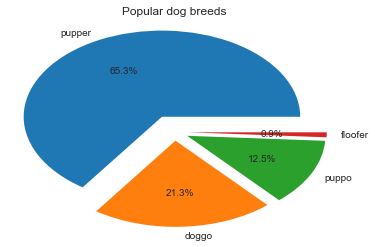

In [440]:
# Which dog breed is the most prevalent
dog_breeds = list(twitter_archives_clean[twitter_archives_clean['dog_breed'] != 'None']['dog_breed'].value_counts())
dog_breed_index = twitter_archives_clean[twitter_archives_clean['dog_breed'] != 'None']['dog_breed'].value_counts().index.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(dog_breeds,explode = explode, labels = dog_breed_index, autopct='%.1f%%')
ax1.axis('auto')
plt.savefig('dog_breeds_count.png')
plt.title("Popular dog breeds")

In [441]:
# Indexing the 'Dates' so dates would be displayed properly in plots
twitter_archives_clean.set_index('Dates', inplace=True)

In [442]:
# Create a rating_ratio variable by dividing the rating numerator by the rating denominator to normalize scores which are not 
# out of 10
twitter_archives_clean['rating_ratio'] = twitter_archives_clean['rating_numerator']/twitter_archives_clean['rating_denominator']

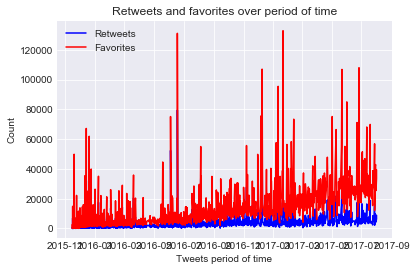

In [443]:
twitter_archives_clean['retweets'].plot(color = 'blue', label='Retweets')
twitter_archives_clean['favorites'].plot(color = 'red', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweets period of time')
plt.ylabel('Count')
plt.title('Retweets and favorites over period of time')
plt.savefig('retweets_favorites.png')
plt.show()

Visualisation  out the top 10 of dog names with retweets rate.

In [444]:
twitter_archives_clean.drop(twitter_archives_clean.query('(name == "None")').index ,inplace=True)

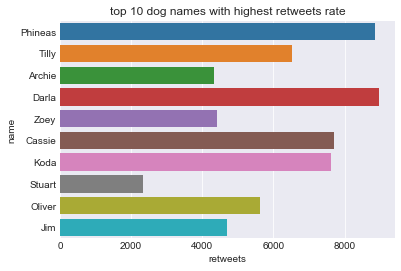

In [445]:
sns.barplot(x="retweets",y="name", data = twitter_archives_clean[0:10]);
plt.title('top 10 dog names with highest retweets rate')
plt.savefig('dogs_names.png')